# **Um Estudo sobre Simulação Numérica de Necrose de Células Tumorais por Hipertermia Local**

Disciplina: Introdução aos Métodos Discretos<br>
Professor: Dr. Ruy Freitas Reis<br>
Aluno: Yago Pereira dos Anjos Santos, Matrícula: 130120017


## **1. Motivação e Contextualização**

O presente trabalho é motivado pelo esforço científico empregado na difícil busca por melhorias no tratamento do câncer. O tratamento do câncer requer o uso de técnicas específicas para a destruição de tumores. Com base em [3], será abordada aqui a técnica conhecida como hipertermia. A ideia principal desta técnica é aquecer uma determinada região comprometida com um tumor de modo que acima de uma temperatura limite, as células tumorais são destruídas. Uma técnica promissora emergente para atingir este objetivo envolve o uso de nanopartículas magnéticas que geram calor quando um campo magnético alternado é aplicado.

## **2. Formulação do Modelo**

A variação da temperatura muscular causada pelo processo de hipertermia por nanopartículas magnéticas pode ser matematicamente modelado por meio da equação de Pennes [2], conforme apresentado no modelo a seguir:

\begin{align}
\begin{cases}
    &\rho\,c\,\dfrac{\partial\,T(\vec{x}, t)}{\partial\,t} = \nabla \cdot k\,\nabla\,T(\vec{x}, t) + \omega_{b}\,\rho_{b}\,c_{b}\,(T_{a} - T(\vec{x}, t)) + Q_{m}(\vec{x}) + Q_{r}(\vec{x}, t), \ \vec{x} \text{ em } \Omega, t \geq 0 \\
    &T(\vec{x}, t) = 37, \ \vec{x} \text{ em } \partial\,\Omega_{A}, t \geq 0 \\
    &\nabla\,T(\vec{x}, t)\,\cdot\,\vec{n} = 0, \ \vec{x} \text{ em } \partial\,\Omega_{B, C, D}, t \geq 0 \\
    &T(\vec{x}, 0) = 37, \ \vec{x} \text{ em } \Omega.
\end{cases}
\end{align}

Na equação anterior, $\rho, c \text{ e } k$ são, respectivamente, a densidade, o calor específico e a condutividade térmica do músculo; $c_{b}, \rho_{b} \text{ e } \omega_{b}$ são, respectivamente, o calor específico do sangue, a densidade do sangue e a taxa de perfusão sanguínea; $Q_{m}$ denota a geração de calor metabólica; $T_{a}$ é a temperatura sanguínea arterial e $T$ é a temperatura do músculo; $Q_{r}$ é o termo que representa o calor gerado pela processo de hipertermia com nanopartículas magnéticas.  Essa geração de calor é modelada (para o caso de tratamento por hipertermia) por uma taxa de absorção específica (Specific Absorption Rate SAR) [4]. De acordo com [4], o SAR ao redor da região de aplicação devido à nanopartículas magnéticas pode ser aproximada por uma distribuição  Gaussiana expressa por $SAR = A\,e^{-r^{2}/r_{0}}$, onde $r$ é a distância espacial do ponto de injeção, $A$ é a amplitude máxima da geração de calor e $r_{0}$ é o limite em que a geração de calor pode afetar o músculo. Desta forma, a geração de calor espacial externa $Q_r$ considera $n$ pontos de injeção e é representada por $Q_{r}(\vec{x}, t) = \sum\limits_{i = 1}^{n} A_{i}\,e^{-r(\vec{x})^{2}_{i}/r_{0, i}^{2}}$.

Além disso, a geração metabólica de calor é dada por $Q_{m}(\vec{x}) = 4200$ se $\vec{x}$ pertence à região tumoral e $Q_{m}(\vec{x}) = 420$ caso contrário. A seguir, encontram-se tabelados os valores dos parâmetros para o modelo analisado neste trabalho:

<div align="center">


_**Tabela 2.1:** Parâmetros do modelo._

| **Símbolo** | **Descrição** | **Unidade** | **Músculo Saudável** | **Músculo Tumoral** |
|-----------|-----------|-----------|-----------|-----------|
| $c$ | Calor específico do músculo | ($J/Kg^{o}C$) | 4200.0 | 4200.0 |
| $c_{b}$ | Calor específico do sangue | ($J/Kg^{o}C$) | 4200.0 | 4200.0 |
| $k$ | Condutividade térmica do músculo | ($W/m^{o}C$) | 0.5 | 0.55 |
| $\rho$ | Densidade do músculo | ($Kg/m^{3}$) | 1000.0 | 1000.0 |
| $\rho_{b}$ | Densidade do sangue | ($kg/m^{3}$) | 1000.0 | 1000.0 |
| $\omega_{b}$ | Perfusão sanguínea | ($ml/s/ml$) | 0.00051 | 0.00125 |

</div>

Além disso, tem-se também parâmetros para a aplicação do tratamento com hipertermia, que encontram-se na tabela seguinte:

<div align="center">

_**Tabela 2.2:** Parâmetros da aplicação do tratamento com hipertermia._

| **Símbolo** | **Descrição** | **Unidade** | **Um Ponto** | **Quatro Pontos** |
|-----------|-----------|-----------|-----------|-----------|
| $A$ | Amplitude máxima da geração de calor | ($W/m^{3}$) | $1.3\times10^{6}$ | $0.325\times10^{6}$ |
| $r_{0}$ | Raio de distância que as partículas espalham | ($m$) | $3.1\times10^{-3}$ | $3.1\times10^{-3}$ |

</div>

Para o modelo considerado aqui, será considerado um domínio $\Omega$ quadrado, cujos lados medem $0.1m$, com uma região central interior também quadrada de lado $0.02m$ representando a área com tumor. O domínio é representado na figura a seguir:

<div align="center">

_**Figura 2.1:** Domínio $\Omega$ considerado para o problema._

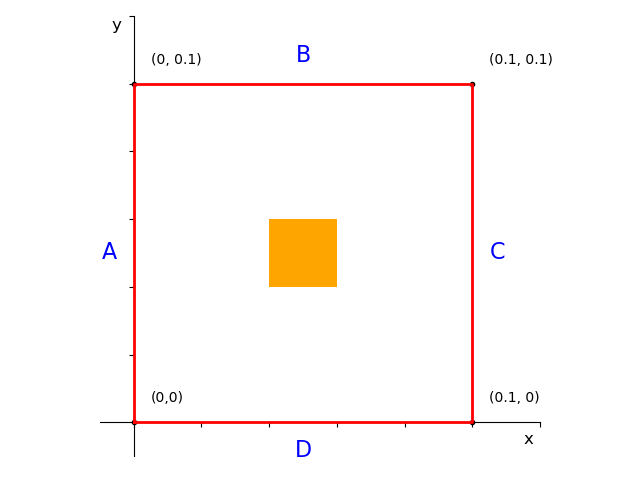

</div>

Conforme formulação do problema, pode-se verificar na Figura 2.1 que no contorno $A$, denotado por $\partial\,\Omega_{A}$ no problema, é aplicada a condição de Dirichlet $T(\vec{x}, t) = 37^{o}C$. Já nos contornos $B, C$ e $D$, representados por $\partial\,\Omega_{B}, \partial\,\Omega_{C}, \partial\,\Omega_{D}$ no problema, é aplicada condição de Neumann em cada um deles, isto é, $\nabla\,T(\vec{x}, t)\,\cdot\,\vec{n} = 0$.

Quando $t \to \infty$, obtem-se a equação do estado estacionário:
\begin{align}
    \nabla\,\cdot\,k\,\nabla\,T(\vec{x}) + \omega_{b}\,\rho_{b}\,c_{b}\,(T_{a} - T(\vec{x})) + Q_{m}(\vec{x}) + Q_{r}(\vec{x}) = 0 \ \text{ em } \Omega
\end{align}

Inicialmente, vamos resolver o problema estacionário e, posteriormente, trataremos o problema transiente completo incluindo a condição inicial conforme formulado no início da seção. O problema estacionário a ser resolvido é formulado da seguinte maneira, com $\dfrac{\partial\,T(\vec{x}, t)}{\partial\,t} = 0$:

\begin{align}
\begin{cases}
    &\nabla\,\cdot\,k\,\nabla\,T(\vec{x}) + \omega_{b}\,\rho_{b}\,c_{b}\,(T_{a} - T(\vec{x})) + Q_{m}(\vec{x}) + Q_{r}(\vec{x}) = 0 \ \text{ em } \Omega \\
    &T(\vec{x}) = 37 \ \text{ em } \partial\,\Omega_{A} \\
    &\nabla\,T(\vec{x})\,\cdot\,\vec{n} = 0 \ \text{ em } \partial\,\Omega_{B, C, D}.
\end{cases}
\end{align}

## **3. Discretização por Diferenças Finitas**

Agora, consideramos a discretização do domínio espacial de maneira usual $x_{i} = i\,h$ e $y_{i} = i\,h$, onde utilizaremos um mesmo passo $h$ tanto para o eixo $x$ quanto para o eixo $y$, lembrando que $h = \frac{0.1 - 0}{n}$, onde $n$ denota o número de divisões do domínio.

### 3.1 Discretizações Espacial e Temporal

Nota-se que $\nabla \cdot k\,\nabla\,T = \dfrac{\partial}{\partial\,x}\left(k\,\dfrac{\partial}{\partial\,x}T\right) + \dfrac{\partial}{\partial\,y}\left(k\,\dfrac{\partial}{\partial\,y}T\right)$. Olhando para $x$ e $y$ separadamente, podemos discretizá-los utilizando diferenças centradas para meio heterogêneos, conforme visto em aula. Desta forma, temos:

\begin{align*}
    &\dfrac{\partial}{\partial\,x}\left(k\,\dfrac{\partial}{\partial\,x}T\right) \approx \dfrac{1}{h^{2}}\,(k_{i-1/2, j}\,T_{i-1, j} + k_{i+1/2, j}\,T_{i+1, j} - (k_{i - 1/2, j} + k_{i+1/2, j})\,T_{i, j}), \\
    &\dfrac{\partial}{\partial\,y}\left(k\,\dfrac{\partial}{\partial\,y}T\right) \approx \dfrac{1}{h^{2}}\,(k_{i, j-1/2}\,T_{i, j-1} + k_{i, j+1/2}\,T_{i, j+1} - (k_{i, j-1/2} + k_{i, j+1/2})\,T_{i, j}).
\end{align*}

Diante disso, segue que:
\begin{align*}
    \nabla\,\cdot\,k\,(\nabla\,T) \approx \dfrac{1}{h^{2}}\,\left( k_{i-1/2, j}\,T_{i-1, j} + k_{i+1/2, j}\,T_{i+1, j} + k_{i, j-1/2}\,T_{i, j-1} + k_{i, j+1/2}\,T_{i, j+1} - (k_{i - 1/2, j} + k_{i+1/2, j} + k_{i, j-1/2} + k_{i, j+1/2})\,T_{i, j} \right)
\end{align*}

Em relação ao tempo, aproximamos a derivada com uma diferença progressiva com um passo de tempo $h_{t}$ da seguinte maneira:
\begin{align}
    \frac{\partial\,T}{\partial\,t} \approx \frac{T^{n+1}_{i, j} - T^{n}_{i, j}}{h_{t}}.
\end{align}

Agora, substituindo as aproximações na equação diferencial, e considerando que será utilizando um método de Euler implícito para a solução do caso transiente do problema, temos a seguinte forma de diferenças finitas implícito:

\begin{align}
    &\rho\,c\,\left(\frac{T^{n+1}_{i, j} - T^{n}_{i, j}}{h_{t}}\right) = \\
    &\dfrac{1}{h^{2}}\,\left( k_{i-1/2, j}\,T^{n+1}_{i-1, j} + k_{i+1/2, j}\,T^{n+1}_{i+1, j} + k_{i, j-1/2}\,T^{n+1}_{i, j-1} + k_{i, j+1/2}\,T^{n+1}_{i, j+1} - (k_{i - 1/2, j} + k_{i+1/2, j} + k_{i, j-1/2} + k_{i, j+1/2})\,T^{n+1}_{i, j} \right) \\
    &- (\omega_{b})_{i, j}\,\rho_{b}\,c_{b}\,T^{n+1}_{i, j} -(\omega_{b})_{i, j}\,\rho_{b}\,c_{b}\,T_{a} - (Q_{m})_{i, j} - (Q_{r})_{i, j}.
\end{align}

Observamos também que podemos escrever a equação estacionária $\nabla\,\cdot\,k\,\nabla\,T(\vec{x}) + \omega_{b}\,\rho_{b}\,c_{b}\,(T_{a} - T(\vec{x})) + Q_{m}(\vec{x}) + Q_{r}(\vec{x}) = 0$ da seguinte maneira: $\nabla\,\cdot\,k\,\nabla\,T(\vec{x}) - \omega_{b}\,\rho_{b}\,c_{b}\,T(\vec{x}) = -\omega_{b}\,\rho_{b}\,c_{b}\,T_{a} - Q_{m}(\vec{x}) - Q_{r}(\vec{x})$. Assim, a discretização para este caso é dada por:

\begin{align*}
    &\dfrac{1}{h^{2}}\,\left( k_{i-1/2, j}\,T_{i-1, j} + k_{i+1/2, j}\,T_{i+1, j} + k_{i, j-1/2}\,T_{i, j-1} + k_{i, j+1/2}\,T_{i, j+1} - (k_{i - 1/2, j} + k_{i+1/2, j} + k_{i, j-1/2} + k_{i, j+1/2})\,T_{i, j} \right) - (\omega_{b})_{i, j}\,\rho_{b}\,c_{b}\,T_{i, j} = \\
    &= -(\omega_{b})_{i, j}\,\rho_{b}\,c_{b}\,T_{a} - (Q_{m})_{i, j} - (Q_{r})_{i, j}.
\end{align*}

Os valores de $k$ devem ser calculados usando a média harmônica para garantir a continuidade do fluxo. Assim, temos as seguinte expressões:

* $k_{i+1/2, j} = \dfrac{2k_{i,j}k_{i+1,j}}{k_{i,j}+k_{i+1,j}}$
* $k_{i-1/2, j} = \dfrac{2k_{i,j}k_{i-1,j}}{k_{i,j}+k_{i-1,j}}$
* $k_{i, j+1/2} = \dfrac{2k_{i,j}k_{i,j+1}}{k_{i,j}+k_{i,j+1}}$
* $k_{i, j-1/2} = \dfrac{2k_{i,j}k_{i,j-1}}{k_{i,j}+k_{i,j-1}}$

### 3.2 Condições de Contorno

A equação de diferenças finitas fornecida, que descreve a evolução da temperatura em um ponto interno do domínio. Para resolver o problema completo, é crucial aplicar as condições de contorno de Dirichlet e Neumann nas fronteiras do domínio. A condição de Dirichlet define um valor de temperatura fixo e conhecido na fronteira do domínio. No problema em questão, a borda esquerda do tecido está em contato com o sangue arterial, mantido a uma temperatura constante $T_a = 37^{o}C$. Para qualquer ponto $(0,j)$ na borda esquerda, a temperatura é sempre igual à temperatura arterial, independentemente do tempo, de modo que $ T_{0, j}^{n+1} = T_a $. Os pontos de fronteira com condição de Dirichlet não requerem a solução da equação de diferenças finitas. Em vez disso, seu valor é simplesmente fixado. Isso reduz o tamanho do sistema de equações a ser resolvido, pois as incógnitas correspondentes a esses pontos são eliminadas e seus valores conhecidos são movidos para o lado direito da equação do sistema linear.

A condição de Neumann especifica o fluxo de calor através da fronteira. No nosso problema, as bordas superior, inferior e direita do domínio são consideradas isoladas, o que corresponde a um fluxo de calor nulo. A derivada da temperatura em relação à direção normal à fronteira é igual a zero. Por exemplo, para um ponto na borda superior ($j=j_{max}$), temos: $ \frac{\partial T}{\partial y} = 0 $. Utilizando a aproximação por diferenças finitas centrais, isso implica que a temperatura em um ponto "fantasma" externo à malha é igual à temperatura do ponto vizinho interno. Para a borda superior, por exemplo, a aproximação $\dfrac{T_{i, j_{max}+1} - T_{i, j_{max}-1}}{2h} = 0$ nos leva a: $ T_{i, j_{max}+1}^{n+1} = T_{i, j_{max}-1}^{n+1} $. A equação discretizada para um ponto na fronteira é modificada. O termo que faria referência a um ponto fantasma (por exemplo, $T_{i, j_{max}+1}^{n+1}$) é substituído pelo valor de um ponto real dentro do domínio ($T_{i, j_{max}-1}^{n+1}$). Isso garante que o sistema permaneça fechado, sem precisar de valores fora da malha, e reflete a ausência de fluxo de calor para fora do domínio.



## **4. Simulações Numéricas**

Para as simulações realizadas neste estudo, considera-se que acima da temperatura limite de $47^{o}C$ as células são destruídas por necrose conforme indicado em [3]. Além disso, será utilizado um mesmo passo $h = 10^{-3}$ para cada uma das discretizações dos eixos espaciais. Assim, temos um total de $101$ pontos no eixo $x$ e esta mesma quantidade no eixo $y$, totalizando o número de $10.201$ pontos na malha discretizada. Para o domínio do tempo discretizado é definido o passo de tempo $h_{t} = 5s$. Além disso, os parâmetros da equação utilizada
para modelar a biotransferência de calor estão especificados na Tabela 2.1, enquanto os parâmetros da fonte de calor aplicada estão na Tabela 2.2. As simulações serão divididas em dois casos distintos de injeção: um caso para um único ponto de injeção $(x, y) = (0.05, 0.05)$ e outro caso para quatro pontos de injeção, situados em $(x_{1}, y_{1}) = (0.045, 0.045), (x_{2}, y_{2}) = (0.055, 0.045), (x_{3}, y_{3}) = (0.045, 0.055)$ e $(x_{4}, y_{4}) = (0.055, 0.055)$.

### 4.1 O Caso Estacionário

Conforme mencionado anteriormente, começaremos com a simulação do modelo no estado estacionário. A seguir temos a implementação deste primeiro caso.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

# Definindo a discretização
h = 1e-3
x = np.arange(0, 0.1 + h, h)
y = np.arange(0, 0.1 + h, h)

# Criando a malha de pontos (variaveis globais)
X_grid, Y_grid = np.meshgrid(x, y)
dim_y = len(y)
dim_x = len(x)
num_pontos_total = dim_x * dim_y

# Parâmetros e Funções do problema (variaveis globais)
pb = 1000.0  # rho_b densidade do sangue
p = 1000.0  # rho densidade do músculo
cb = 4200.0  # c_b calor específico do sangue
c = 4200.0  # c calor específico do músculo
Ta = 37.0    # Temperatura arterial

# Cenários de injeção
pontos_injecao_1 = [(0.05, 0.05)]
pontos_injecao_4 = [(0.045, 0.045), (0.055, 0.045), (0.045, 0.055), (0.055, 0.055)]

def wb(x, y):
    """ Função omega_b taxa de perfusão sanguínea """
    return 1.25e-3 if 0.04 <= x <= 0.06 and 0.04 <= y <= 0.06 else 5.1e-4

def k_func(x, y):
    """ Função de condutividade térmica """
    return 0.55 if 0.04 <= x <= 0.06 and 0.04 <= y <= 0.06 else 0.5

def Qm(x, y):
    """ Função de calor metabólico Q_m """
    return 4200 if 0.04 <= x <= 0.06 and 0.04 <= y <= 0.06 else 420

def Qr(i, j, n, r):
    """ Função de calor de radiação Q_r """
    r0 = 3.1e-3
    ans = 0.0
    A = 1.3e6 if n == 1 else 0.325e6
    for k_inj in range(n):
        ans += A * np.exp(-r[k_inj][i, j]**2/ r0**2)
    return ans

def simular_distribuicao_temperatura(pontos_injecao, titulo):
    """
    Simula a distribuição de temperatura para um dado conjunto de pontos de injeção.
    """
    num_pontos_injecao = len(pontos_injecao)
    
    # Calculando as distâncias dos pontos de injeção
    r = np.zeros((num_pontos_injecao, dim_y, dim_x))
    for i, (p1, p2) in enumerate(pontos_injecao):
        distancia_matriz = np.sqrt((X_grid - p1)**2 + (Y_grid - p2)**2)
        r[i, :, :] = distancia_matriz

    # Inicializando a matriz de coeficientes A e o vetor de termos b
    # A é a matriz do sistema linear Ax=b, onde x é o vetor de temperaturas.
    # b é o vetor de termos independentes, que inclui fontes de calor e condições de contorno.
    A = np.zeros((num_pontos_total, num_pontos_total))
    b = np.zeros(num_pontos_total)

    # Loop sobre a malha para preencher A e b
    # Este loop formula a equação de balanço de energia para cada ponto da malha, convertendo o problema diferencial em um sistema de equações lineares.
    for j in range(dim_y):
        for i in range(dim_x):
            # Mapeia o índice 2D (i, j) para um índice 1D (k_flat) para corresponder às posições no vetor x e na matriz A.
            k_flat = i + j * dim_x

            # Coeficientes do lado esquerdo da equação
            # O termo de convecção sanguínea é calculado e adicionado ao termo principal.
            omega_b_ij = wb(x[i], y[j])
            rho_b_c_b = pb * cb
            coef_conveccao = -omega_b_ij * rho_b_c_b
            coef_principal = 0.0

            # Termos para os vizinhos e a matriz A
            # A matriz A é preenchida com os coeficientes de difusão usando a média harmônica para lidar com a variação de k (condutividade).

            # Vizinho da direita (i+1, j)
            if i < dim_x - 1:
                k_central = k_func(x[i], y[j])
                k_vizinho = k_func(x[i+1], y[j])
                k_direita = 2 * k_central * k_vizinho / (k_central + k_vizinho) if k_central != k_vizinho else k_central
                A[k_flat, k_flat + 1] = k_direita / h**2
                coef_principal -= k_direita
            
            # Vizinho da esquerda (i-1, j)
            if i > 0:
                k_central = k_func(x[i], y[j])
                k_vizinho = k_func(x[i-1], y[j])
                k_esquerda = 2 * k_central * k_vizinho / (k_central + k_vizinho) if k_central != k_vizinho else k_central
                A[k_flat, k_flat - 1] = k_esquerda / h**2
                coef_principal -= k_esquerda
                
            # Vizinho de cima (i, j+1)
            if j < dim_y - 1:
                k_central = k_func(x[i], y[j])
                k_vizinho = k_func(x[i], y[j+1])
                k_cima = 2 * k_central * k_vizinho / (k_central + k_vizinho) if k_central != k_vizinho else k_central
                A[k_flat, k_flat + dim_x] = k_cima / h**2
                coef_principal -= k_cima
                
            # Vizinho de baixo (i, j-1)
            if j > 0:
                k_central = k_func(x[i], y[j])
                k_vizinho = k_func(x[i], y[j-1])
                k_baixo = 2 * k_central * k_vizinho / (k_central + k_vizinho) if k_central != k_vizinho else k_central
                A[k_flat, k_flat - dim_x] = k_baixo / h**2
                coef_principal -= k_baixo

            # O coeficiente principal é a soma dos coeficientes dos vizinhos,
            # mais o termo de convecção. Ele é colocado na diagonal principal de A.
            # O sistema de equações representa o balanço de energia para cada ponto da malha.
            # Para as bordas B, C e D (onde a condição de Dirichlet não é aplicada),
            # o fato de não existir um vizinho "fora" da malha faz com que o termo correspondente
            # no somatório do Laplaciano seja zero. Essa formulação de diferenças finitas para
            # uma borda livre (sem vizinho externo) é a implementação padrão de uma
            # condição de contorno de Neumann de fluxo zero, o que representa uma borda isolada.
            A[k_flat, k_flat] = coef_principal / h**2 + coef_conveccao

            # Coeficientes para o vetor b
            # O vetor b é construído com os termos de fonte de calor (metabólico e radiação)
            # e o termo de convecção sanguínea (que é um termo de fonte).
            Q_m_ij = Qm(x[i], y[j])
            Q_r_ij = Qr(i, j, num_pontos_injecao, r)
            b[k_flat] = -omega_b_ij * rho_b_c_b * Ta - Q_m_ij - Q_r_ij

    # Aplicando as Condições de Contorno (Dirichlet)
    # Para a borda em x=0, a temperatura é fixa em 37°C.
    for j in range(dim_y):
        for i in range(dim_x):
            k_flat = i + j * dim_x
            if i == 0:
                # Zera toda a linha correspondente a este ponto na matriz A.
                A[k_flat, :] = 0  
                # Coloca 1.0 na diagonal principal para garantir que a equação se torne
                # 1 * T_flat = 37.0, fixando o valor da temperatura.
                A[k_flat, k_flat] = 1  
                # Define o valor de 37.0 no vetor b.
                b[k_flat] = 37.0 

    # Resolvendo o sistema linear
    A_esparsa = csc_matrix(A)
    T_vetor = spsolve(A_esparsa, b)
    T_matriz = T_vetor.reshape((dim_y, dim_x))

    # Plotando a solução
    # plt.figure(figsize=(8, 6))
    plt.imshow(T_matriz, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='gnuplot')
    cbi = plt.colorbar(label='Temperatura (°C)')
    cbi.outline.set_edgecolor('black')
    cbi.outline.set_linewidth(1.5)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(titulo)
    plt.grid(True, color='black', linestyle=':', alpha=0.7)
    # Definindo o passo de 0.01 para as marcações dos eixos
    passo_ticks = 0.01
    # Criando uma lista de valores de 0.01 em 0.01 para os eixos
    ticks_x = np.arange(x.min(), x.max() + passo_ticks, passo_ticks)
    ticks_y = np.arange(y.min(), y.max() + passo_ticks, passo_ticks)
    # Aplicando as marcações nos eixos X e Y
    plt.xticks(ticks_x)
    plt.yticks(ticks_y)
    plt.tight_layout()
    plt.savefig(f'{titulo}.png')
    plt.show()

A seguir é simulado o caso para um único ponto de injeção, isto é, no centro do tumor. Em seguida é plotado a distribuição de temperatura no domínio.

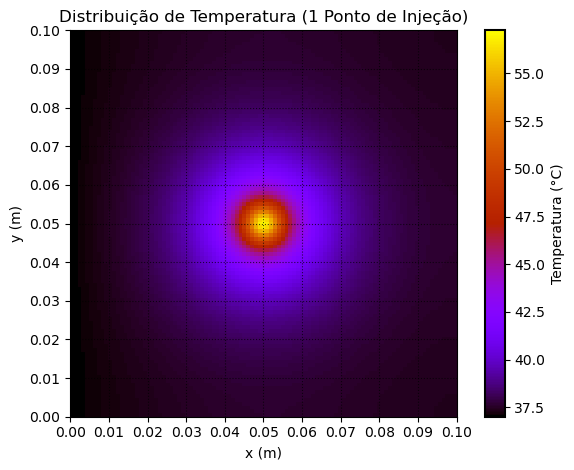

In [16]:
# Simulação 1: Um ponto de injeção no centro
simular_distribuicao_temperatura(pontos_injecao_1, 'Distribuição de Temperatura (1 Ponto de Injeção)')

Agora, a simulação é feita considerando quatro pontos de injeção. Assim como no caso anterior, é plotado a distribuição de temperatura no domínio.

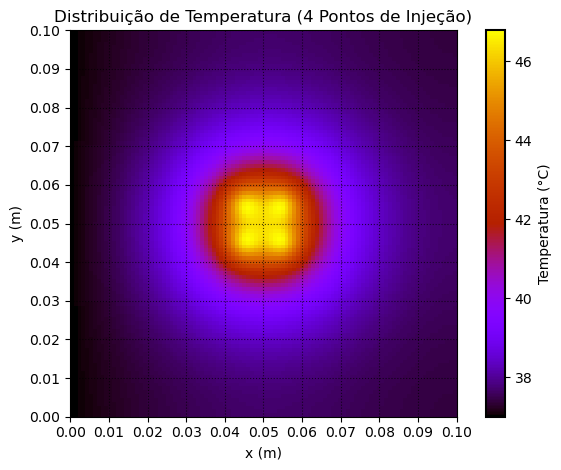

In [17]:
# Simulação 2: Quatro pontos de injeção
simular_distribuicao_temperatura(pontos_injecao_4, 'Distribuição de Temperatura (4 Pontos de Injeção)')

### 4.2 O Caso Transiente

Para o caso transiente também temos a variação da temperatura no tempo além do espaço. A seguir temos a implementação para a simulação deste contexto.

In [ ]:
import multiprocessing

def wb(x, y):
    """Função omega_b."""
    return np.where((0.04 <= x) & (x <= 0.06) & (0.04 <= y) & (y <= 0.06), 1.25e-3, 5.1e-4)

def k_func(x, y):
    """Função de condutividade térmica."""
    return np.where((0.04 <= x) & (x <= 0.06) & (0.04 <= y) & (y <= 0.06), 0.55, 0.5)

def Qm(x, y):
    """Função de calor metabólico Q_m."""
    return np.where((0.04 <= x) & (x <= 0.06) & (0.04 <= y) & (y <= 0.06), 4200, 420)

def simular_transiente_implicito(pontos_injecao, duracao_s, dt, pontos_para_plotar):
    """
    Simula a distribuição de temperatura usando o método implícito.
    """
    num_pontos_injecao = len(pontos_injecao)
    indices_para_plotar = {ponto: (int(ponto[1]/h), int(ponto[0]/h)) for ponto in pontos_para_plotar}
    dados_tempo_pontos = {ponto: [] for ponto in pontos_para_plotar}
    tempos_coletados = []
    T = np.full((dim_y, dim_x), Ta)

    r = np.zeros((num_pontos_injecao, dim_y, dim_x))
    for i, (p1, p2) in enumerate(pontos_injecao):
        distancia_matriz = np.sqrt((X_grid - p1)**2 + (Y_grid - p2)**2)
        r[i, :, :] = distancia_matriz

    Q_m = Qm(X_grid, Y_grid)
    Q_r = np.zeros((dim_y, dim_x))
    for i in range(dim_y):
        for j in range(dim_x):
            Q_r[i, j] = Qr(i, j, num_pontos_injecao, r)
            
    # Construção da matriz do lado esquerdo (LHS) para o método implícito
    A_lhs = np.zeros((num_pontos_total, num_pontos_total))
    
    for j in range(dim_y):
        for i in range(dim_x):
            k_flat = i + j * dim_x
            
            # Coeficientes
            pc = p * c
            wb_local = wb(x[i], y[j])
            k_local = k_func(x[i], y[j])
            
            # Termo do lado esquerdo
            diag_val = (pc / dt) + (wb_local * pb * cb)
            
            # Adicionando termos de Laplaciano
            if i < dim_x - 1:
                k_vizinho = k_func(x[i+1], y[j])
                k_direita = 2 * k_local * k_vizinho / (k_local + k_vizinho) if k_local != k_vizinho else k_local
                A_lhs[k_flat, k_flat + 1] = -k_direita / h**2
                diag_val += k_direita / h**2
            if i > 0:
                k_vizinho = k_func(x[i-1], y[j])
                k_esquerda = 2 * k_local * k_vizinho / (k_local + k_vizinho) if k_local != k_vizinho else k_local
                A_lhs[k_flat, k_flat - 1] = -k_esquerda / h**2
                diag_val += k_esquerda / h**2
            if j < dim_y - 1:
                k_vizinho = k_func(x[i], y[j+1])
                k_cima = 2 * k_local * k_vizinho / (k_local + k_vizinho) if k_local != k_vizinho else k_local
                A_lhs[k_flat, k_flat + dim_x] = -k_cima / h**2
                diag_val += k_cima / h**2
            if j > 0:
                k_vizinho = k_func(x[i], y[j-1])
                k_baixo = 2 * k_local * k_vizinho / (k_local + k_vizinho) if k_local != k_vizinho else k_local
                A_lhs[k_flat, k_flat - dim_x] = -k_baixo / h**2
                diag_val += k_baixo / h**2
                
            A_lhs[k_flat, k_flat] = diag_val
            
    A_lhs_esparsa = csc_matrix(A_lhs)

    num_passos_t = int(duracao_s / dt)
    
    # Coleta o estado inicial
    tempos_coletados.append(0)
    for ponto, indices in indices_para_plotar.items():
        y_idx, x_idx = indices
        dados_tempo_pontos[ponto].append(T[y_idx, x_idx])

    for passo in range(1, num_passos_t + 1):
        T_vetor = T.flatten()
        
        # Construção do vetor do lado direito (RHS)
        b_rhs = (p * c / dt) * T_vetor + Q_m.flatten() + Q_r.flatten() + wb(X_grid, Y_grid).flatten() * pb * cb * Ta
        
        # Resolvendo o sistema linear para encontrar a nova temperatura
        T_novo_vetor = spsolve(A_lhs_esparsa, b_rhs)
        T = T_novo_vetor.reshape((dim_y, dim_x))
        
        # Aplicando a condição de contorno de Dirichlet na borda esquerda
        T[:, 0] = Ta
        
        # Coletando dados em intervalos de 50s
        if (passo * dt) % 50 == 0:
            tempo_atual = passo * dt
            tempos_coletados.append(tempo_atual)
            for ponto, indices in indices_para_plotar.items():
                y_idx, x_idx = indices
                dados_tempo_pontos[ponto].append(T[y_idx, x_idx])
    
    # Adiciona o ponto final para garantir que o gráfico vá até o final da simulação
    tempos_coletados.append(duracao_s)
    for ponto, indices in indices_para_plotar.items():
        y_idx, x_idx = indices
        dados_tempo_pontos[ponto].append(T[y_idx, x_idx])
            
    return T, tempos_coletados, dados_tempo_pontos

# Parâmetros da simulação
duracao_simulacao = 3000
dt_usado = 0.1

# Pontos de interesse para a plotagem do histórico temporal
pontos_para_plotar = [(0.030, 0.050), (0.045, 0.050)]

# Usando multiprocessing para executar os dois cenários em paralelo
print("Iniciando simulações em paralelo...")
with multiprocessing.Pool(processes=2) as pool:
    resultados = pool.starmap(simular_transiente_implicito, [
        (pontos_injecao_1, duracao_simulacao, dt_usado, pontos_para_plotar),
        (pontos_injecao_4, duracao_simulacao, dt_usado, pontos_para_plotar)
    ])
print("Simulações concluídas.")

T_final_1, tempos_1, dados_1 = resultados[0]
T_final_4, tempos_4, dados_4 = resultados[1]

Iniciando simulações em paralelo...
Simulações concluídas.


Primeiramente apresenta-se o resultado obtido para o caso de um único ponto de injeção. No código a seguir é plotada a distribuição de temperatura no domínio para o tempo $t = 50min \ (3000s)$ para este caso.

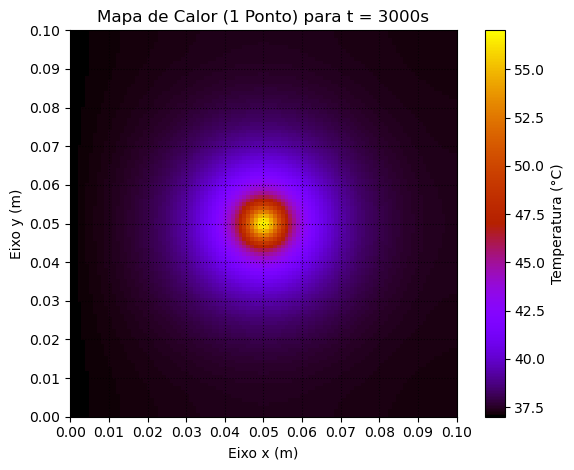

In [19]:
# --- Plotagem da distribuição de temperatura para o caso 1 ---
# plt.figure(figsize=(8, 6))
plt.imshow(T_final_1, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='gnuplot')
cbi = plt.colorbar(label='Temperatura (°C)')
plt.xlabel('Eixo x (m)')
plt.ylabel('Eixo y (m)')
plt.title(f'Mapa de Calor (1 Ponto) para t = {duracao_simulacao}s')
plt.grid(True, color='black', linestyle=':', alpha=0.7)
# Definindo o passo de 0.01 para as marcações dos eixos
passo_ticks = 0.01
# Criando uma lista de valores de 0.01 em 0.01 para os eixos
ticks_x = np.arange(x.min(), x.max() + passo_ticks, passo_ticks)
ticks_y = np.arange(y.min(), y.max() + passo_ticks, passo_ticks)
# Aplicando as marcações nos eixos X e Y
plt.xticks(ticks_x)
plt.yticks(ticks_y)
plt.tight_layout()
plt.savefig('1_ponto_transiente.png')
plt.show()

Agora, relativamente ao resultado obtido para o contexto de quatro pontos de injeção. O código a seguir plota a distribuição de temperatura no domínio para este caso para o tempo $t = 50min \ (3000s)$.

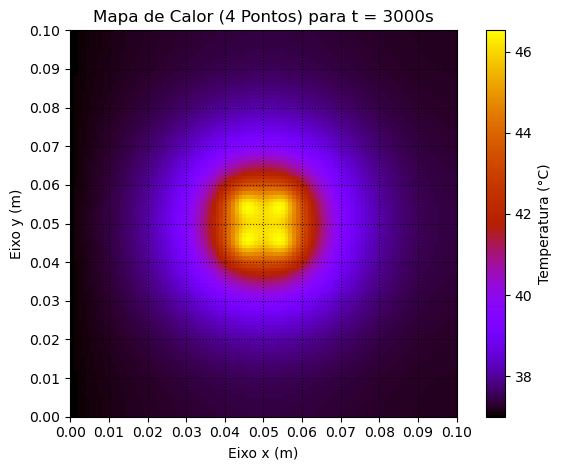

In [20]:
# --- Plotagem da distribuição de temperatura para o caso 2 ---
# plt.figure(figsize=(8, 6))
plt.imshow(T_final_4, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='gnuplot')
cbi = plt.colorbar(label='Temperatura (°C)')
plt.xlabel('Eixo x (m)')
plt.ylabel('Eixo y (m)')
plt.title(f'Mapa de Calor (4 Pontos) para t = {duracao_simulacao}s')
plt.grid(True, color='black', linestyle=':', alpha=0.7)
# Definindo o passo de 0.01 para as marcações dos eixos
passo_ticks = 0.01
# Criando uma lista de valores de 0.01 em 0.01 para os eixos
ticks_x = np.arange(x.min(), x.max() + passo_ticks, passo_ticks)
ticks_y = np.arange(y.min(), y.max() + passo_ticks, passo_ticks)
# Aplicando as marcações nos eixos X e Y
plt.xticks(ticks_x)
plt.yticks(ticks_y)
plt.tight_layout()
plt.savefig('4_pontos_transiente.png')
plt.show()

No gráfico a seguir observa-se a evolução temporal de dois pontos distintos, um ponto na região saudável do músculo $(0.030, 0.050)$ e outro ponto na região tumoral $(0.045, 0.050)$, para ambos os casos de injeção (um ponto de injeção e quatro pontos de injeção).

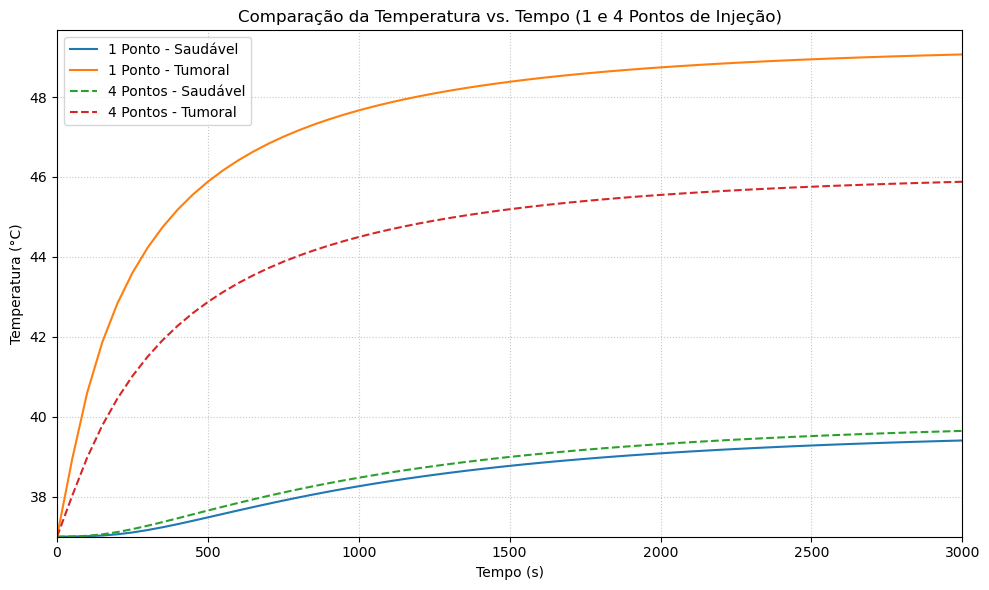

In [21]:
# --- Plotagem do histórico temporal para ambos os casos ---
plt.figure(figsize=(10, 6))
# Caso 1
for ponto, temperaturas in dados_1.items():
    label_ponto = "Tumoral" if ponto == (0.045, 0.050) else "Saudável"
    plt.plot(tempos_1, temperaturas, label=f'1 Ponto - {label_ponto}', linestyle='-')
# Caso 2
for ponto, temperaturas in dados_4.items():
    label_ponto = "Tumoral" if ponto == (0.045, 0.050) else "Saudável"
    plt.plot(tempos_4, temperaturas, label=f'4 Pontos - {label_ponto}', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.ylim(37, )
plt.xlim(0, 3000)
plt.title('Comparação da Temperatura vs. Tempo (1 e 4 Pontos de Injeção)')
plt.legend()
plt.grid(True, ls=':', alpha=0.7)
plt.tight_layout()
plt.savefig('evolucao_temporal.png')
plt.show()

## **5. Conclusão**

Em relação às simulações computacionais, conclui-se que o processo é computacionalmente custoso mesmo para a malha com passo $h = 10^{-3}$ principalmente para o caso transiente onde a cada passo de tempo deve-se resolver um sistema linear grande. Houve tentativa visando atenuar esas limitações com a utilização da função `spsolve` da biblioteca `scipi` do Python para lidar com matrizes esparsas de maneira eficiente. Além disso, a solução transiente foi paralelizada por meio da biblioteca `multiprocessing` nativa do Python. Em relação aos resultados obtidos pelas simulações, observa-se que a distribuição de temperatura no domínio obtida para o caso transiente no tempo $t = 50min$ é semelhante àquela obtida para o estado estacionário para ambos os casos, tanto para um ponto de injeção quanto para quatro pontos de injeção. Conclui-se então que para $t = 50min$ o sistema está atingindo o seu estado estacionário. Por fim, é feita uma comparação por meio de gráfico entre as evoluções de temperatura ao longo do tempo em dois pontos do domínio, um fora do tumor e outra dentro do tumor, para od dois casos de estudo (uma injeção, quatro injeções). Conclui-se pelo gráfico que a aplicação em um único ponto se mostra mais viável, uma vez que a temperatura na região tumoral cresce rápidamente enquanto a temperatura no tecido saudável é menor do que àquela comparada ao caso da injeção em quatro pontos. Isso visa evitar a destruição de tecidos saudáveis e favorece a destruição de tecidos tumorais.

### **Referências**

<p>[ 1 ] MINKOWYCZ, W. Advances in numerical heat transfer. CRC press, 1996.</p>
<p>[ 2 ] PENNES, Harry H. Analysis of tissue and arterial blood temperatures in the resting human forearm. Journal of applied physiology, v. 1, n. 2, p. 93-122, 1948.</p>
<p>[ 3 ] REIS, R. F.; LOUREIRO, F. S.; LOBOSCO, M. A parallel 2D numerical simulation of tumor cells necrosis by local hyperthermia. In: Journal of Physics: Conference Series. IOP Publishing, 2014. p. 012138.</p>
<p>[ 4 ] SALLOUM, Maher; MA, Ronghui; ZHU, Liang. An in-vivo experimental study of temperature elevations in animal tissue during magnetic nanoparticle hyperthermia. International Journal of Hyperthermia, v. 24, n. 7, p. 589-601, 2008.</p>